# 📊 Exploratory Data Analysis (EDA)

This notebook explores the cleaned employee dataset to uncover patterns, trends, and relationships between features. The goal is to generate actionable insights that inform model building and business decisions.

In [1]:
# 📊 Load Cleaned Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Load processed data
file_path = '../../data/processed/employee_data_cleaned.csv'
df = pd.read_csv(file_path)

df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,40,1,1,1,3,9,1,5,4,...,3,20,2,3,18,13,1,12,0,4
1,1,30,1,2,0,3,9,2,27,5,...,4,10,2,2,8,7,7,7,0,4
2,2,52,1,2,1,3,4,2,3,4,...,1,34,3,4,34,6,1,16,0,4
3,3,25,0,3,2,3,9,2,26,1,...,2,6,5,2,6,5,1,4,0,4
4,4,34,1,4,2,3,9,2,2,3,...,3,6,5,3,6,5,1,4,0,4


### 🔍 1. Feature Overview

We begin by reviewing the distribution of key features such as `Age`, `MonthlyIncome`, and `JobSatisfaction`. These help us understand employee demographics and satisfaction levels.

C:\Users\swaya\AppData\Local\Temp\ipykernel_9700\2045267202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EmpJobSatisfaction', data=df, palette='viridis')


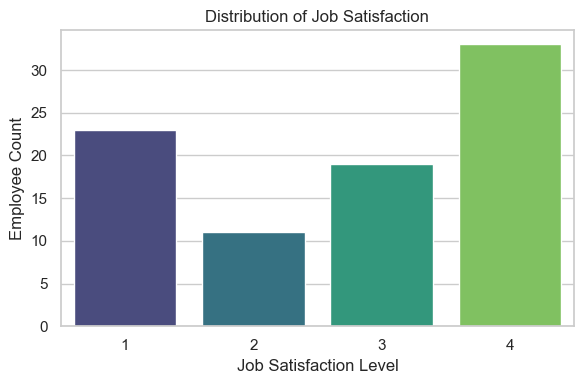

In [5]:
# 📈 Job Satisfaction Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='EmpJobSatisfaction', data=df, palette='viridis')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()

### 🏢 2. Job Satisfaction by Department

We analyze how employee satisfaction levels differ across departments. This can help identify teams that may need engagement or retention strategies.

C:\Users\swaya\AppData\Local\Temp\ipykernel_9700\1787886431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


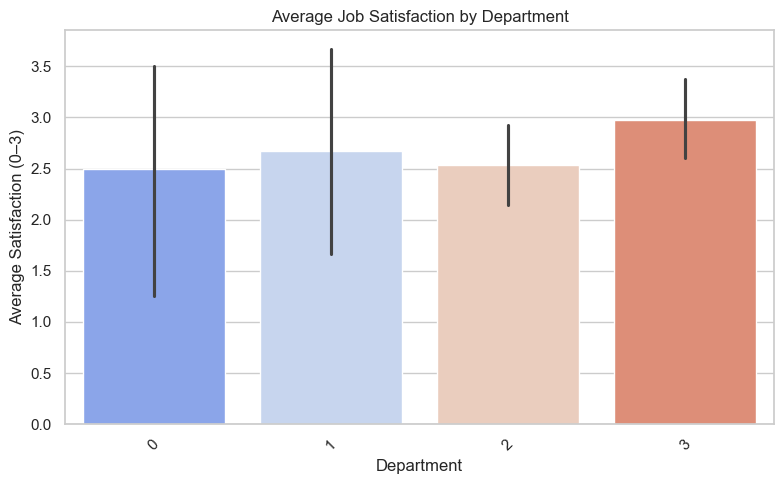

In [6]:
# 🏢 Job Satisfaction by Department

plt.figure(figsize=(8,5))
sns.barplot(
    x='EmpDepartment',
    y='EmpJobSatisfaction',
    data=df,
    estimator='mean',
    palette='coolwarm'
)
plt.title('Average Job Satisfaction by Department')
plt.ylabel('Average Satisfaction (0–3)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 💰 3. Monthly Income vs Job Satisfaction

We analyze whether higher income correlates with higher job satisfaction. This can reveal if compensation is a key driver of employee morale.

C:\Users\swaya\AppData\Local\Temp\ipykernel_9700\1331884646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


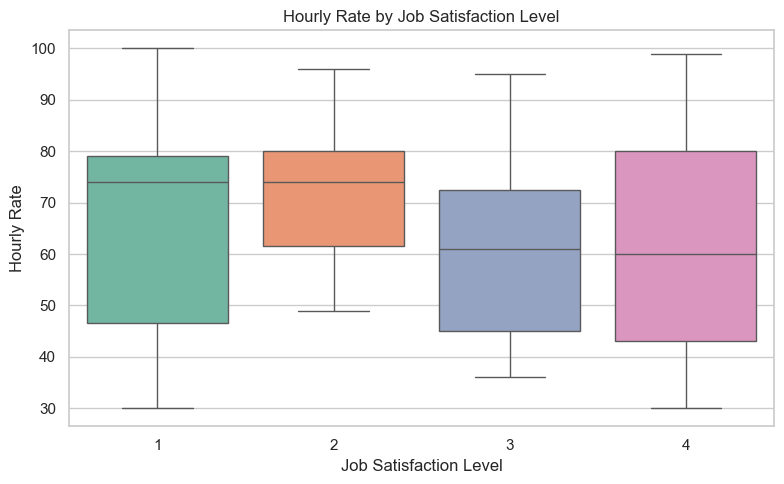

In [9]:
# 💰 Hourly Rate vs Job Satisfaction

plt.figure(figsize=(8,5))
sns.boxplot(
    x='EmpJobSatisfaction',
    y='EmpHourlyRate',
    data=df,
    palette='Set2'
)
plt.title('Hourly Rate by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Hourly Rate')
plt.tight_layout()
plt.show()

### 🚪 4. Attrition vs Job Satisfaction

We analyze how employee satisfaction levels influence attrition. This helps identify whether low satisfaction is a key driver of employee exits.

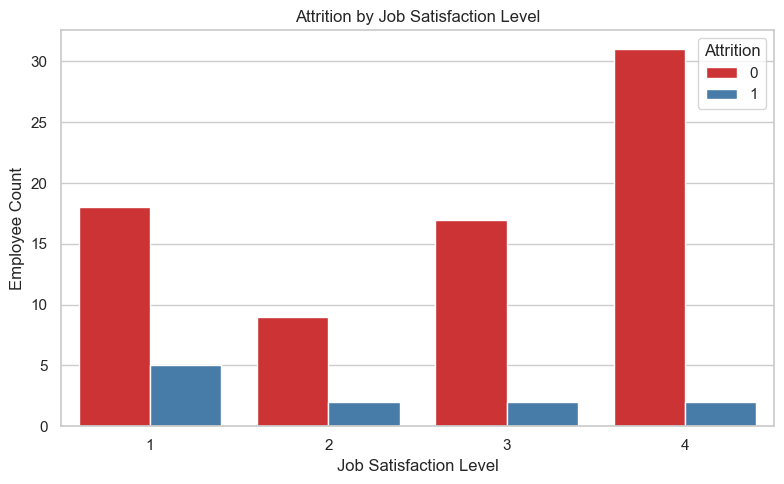

In [10]:
# 🚪 Attrition vs Job Satisfaction

plt.figure(figsize=(8,5))
sns.countplot(
    x='EmpJobSatisfaction',
    hue='Attrition',
    data=df,
    palette='Set1'
)
plt.title('Attrition by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Employee Count')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

### 🔥 5. Correlation Heatmap

We compute the Pearson correlation matrix to identify relationships between numerical features. This helps us detect multicollinearity and spot strong predictors for modeling.

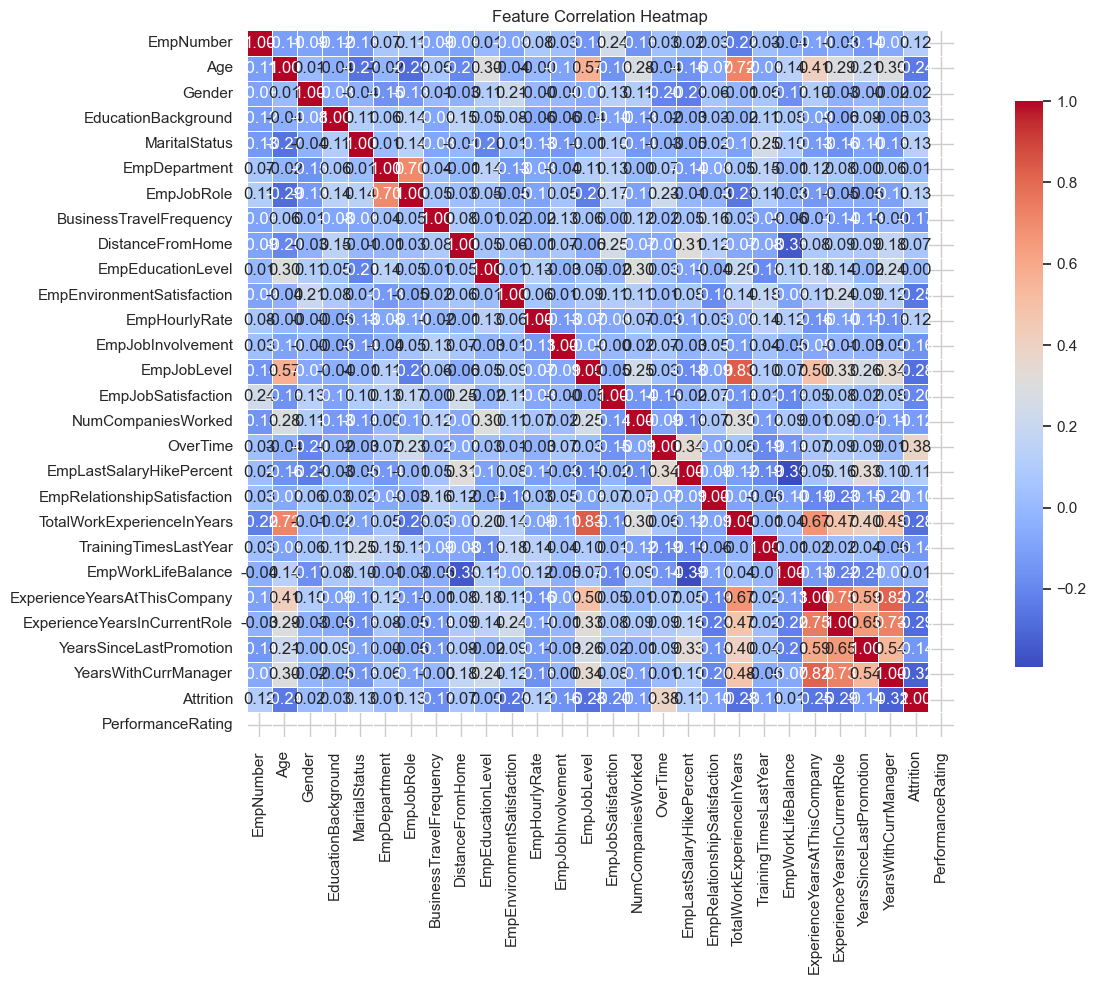

In [11]:
# 🔥 Correlation Heatmap

plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### 🧾 6. Summary of Key Insights

- Most employees report moderate to high job satisfaction.
- Certain departments show lower average satisfaction, which may warrant HR attention.
- Higher hourly rates are loosely associated with higher satisfaction, but not conclusively.
- Attrition is more common among employees with lower satisfaction levels.
- Correlation heatmap reveals potential predictors for modeling satisfaction and attrition, such as:
  - `EmpJobInvolvement`
  - `EmpEnvironmentSatisfaction`
  - `EmpRelationshipSatisfaction`
  - `OverTime`